In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define some global constants
plt.rcParams["figure.figsize"] = (12.8, 7.2)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams["legend.title_fontsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.markersize"] = 6
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

df = pd.read_csv("plots_data.csv")

# what do we care about?
# eccentricity, orbital period and method
df = df[["pl_orbper", "pl_orbeccen", "discoverymethod"]]
df.dropna(inplace=True)
df.head()

,pl_orbper,pl_orbeccen,discoverymethod
0,2124.540000,0.175,Radial Velocity
1,77.611840,0.600,Transit
2,105.956415,0.000,Transit
6,59.877560,0.250,Transit
8,0.669310,0.000,Transit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18469 entries, 0 to 38704
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_orbper        18469 non-null  float64
 1   pl_orbeccen      18469 non-null  float64
 2   discoverymethod  18469 non-null  object 
dtypes: float64(2), object(1)
memory usage: 577.2+ KB


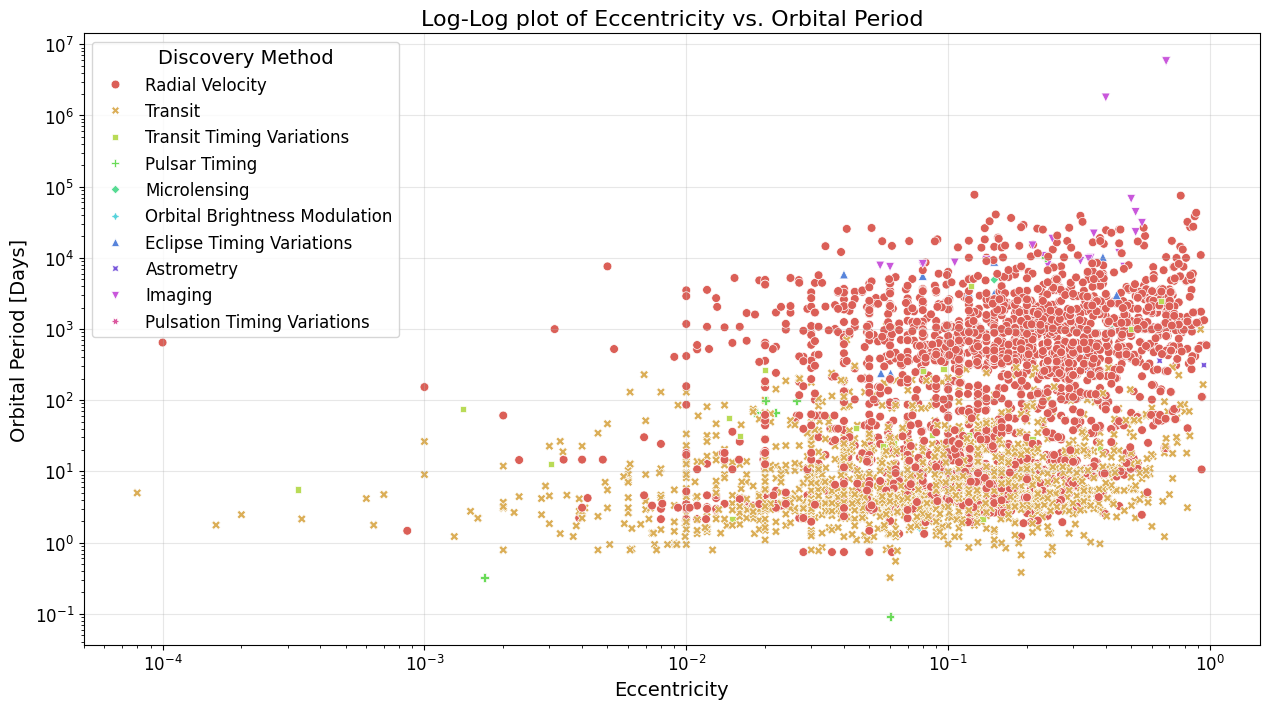

In [10]:
methods = df["discoverymethod"].unique()

sns.scatterplot(
    data=df, 
    x="pl_orbeccen", 
    y="pl_orbper", 
    hue="discoverymethod", 
    style="discoverymethod",
    palette=sns.hls_palette(len(methods)), 
    s=40
)

plt.xscale("log")
plt.yscale("log")

plt.legend(title="Discovery Method")
plt.title("Log-Log plot of Eccentricity vs. Orbital Period")
plt.xlabel("Eccentricity")
plt.ylabel("Orbital Period [Days]")
plt.tight_layout()
plt.show()

# Discussion

I wonder if a more appropriate plot would be mass and eccentricity? since we know the more elliptic orbits are due to the smaller discrepancy between stellar and planetary mass.

In [35]:
# lets plot eccentricity over mass, and see if there is a pattern

df = pd.read_csv("plots_data.csv")
df = df[["pl_masse", "pl_orbeccen", "discoverymethod"]].dropna()
df

,pl_masse,pl_orbeccen,discoverymethod
1,20.100000,0.600,Transit
11,285.729170,0.044,Transit
29,123.000210,0.255,Transit
40,5.900000,0.030,Transit
41,8.400000,0.080,Radial Velocity
...,...,...,...
38662,5085.254512,0.160,Radial Velocity
38687,8725.661086,0.152,Radial Velocity
38690,3.340000,0.320,Transit
38697,492.620000,0.000,Transit


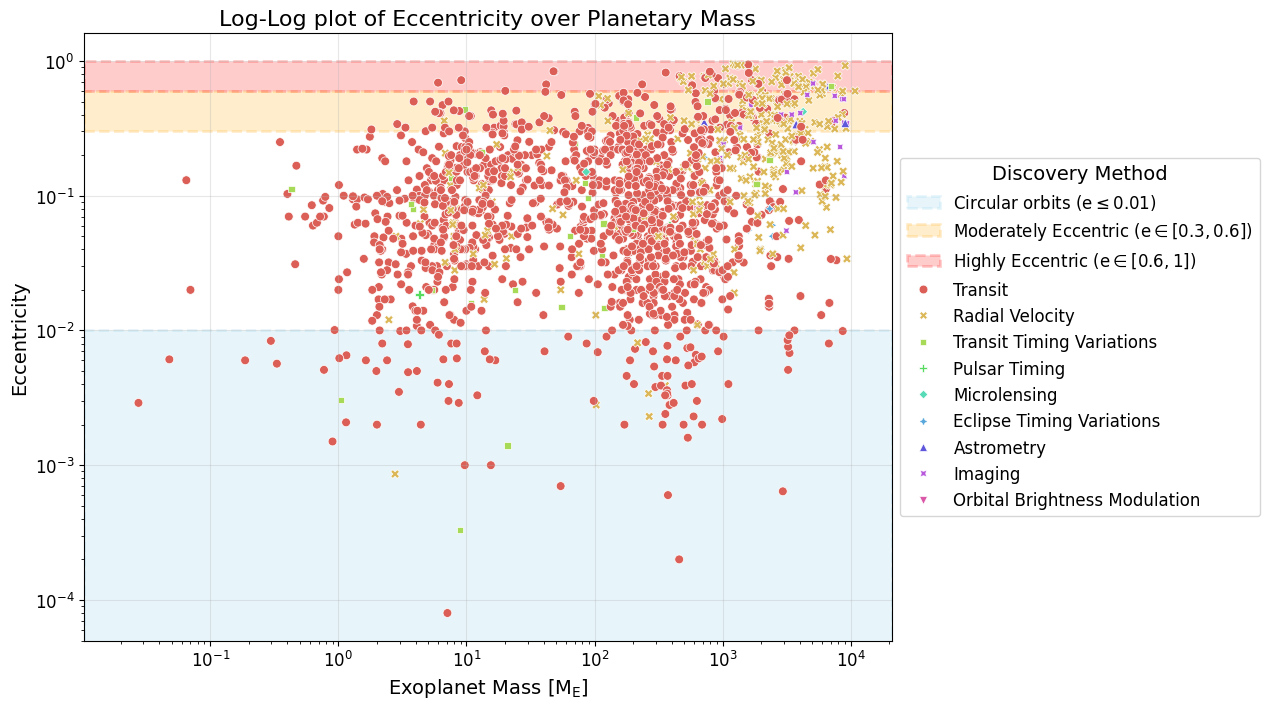

In [36]:
methods = df["discoverymethod"].unique()

# a band for "circular" orbits
plt.axhspan(0.0, 0.01, color="skyblue", linestyle="--", linewidth=2, label=r"Circular orbits (e$\leq 0.01$)", alpha=0.2)

# the moderate-high eccentricity bands
plt.axhspan(0.3, 0.6, color="orange", linestyle="--", linewidth=2, label=r"Moderately Eccentric (e$\in [0.3, 0.6]$)", alpha=0.2)
plt.axhspan(0.6, 1.0, color="red", linestyle="--", linewidth=2, label=r"Highly Eccentric (e$\in [0.6,1]$)", alpha=0.2)

sns.scatterplot(
    data=df, 
    x="pl_masse", 
    y="pl_orbeccen", 
    hue="discoverymethod", 
    style="discoverymethod",
    palette=sns.hls_palette(len(methods)), 
    s=40
)

plt.xscale("log")
plt.yscale("log")

plt.legend(title="Discovery Method", loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Log-Log plot of Eccentricity over Planetary Mass")
plt.xlabel(r"Exoplanet Mass [M$_\text{E}$]")
plt.ylabel("Eccentricity")
plt.tight_layout()
plt.show()